In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [35]:
df = pd.read_csv('C:\\Users\\aahsa\\Downloads\\clean_Recipes.csv')

In [36]:
df.head()

,RecipeId,Name,AuthorId,CookTime,PrepTime,TotalTime,Description,Images,RecipeCategory,Keywords,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,AuthorName
0,38,Low-Fat Berry Blue Frozen Dessert,1533,86400.0,2700,89100,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,1.0,Dancer
1,39,Biryani,1567,1500.0,14400,15900,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,1.0,elly9812
2,40,Best Lemonade,1566,300.0,1800,2100,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,1.0,Stephen Little
3,41,Carina's Tofu-Vegetable Kebabs,1586,1200.0,86400,87600,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,Cyclopz
4,42,Cabbage Soup,1538,1800.0,1200,3000,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,1.0,Duckie067


In [37]:
df.describe()

,RecipeId,AuthorId,CookTime,PrepTime,TotalTime,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,522517.000000,5.225170e+05,5.225170e+05,5.225170e+05,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000,522517.000000,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000,522517.000000
mean,271821.436970,4.572585e+07,1.190006e+04,3.365800e+03,1.527008e+04,2.871862,3.225304,484.438580,24.614922,9.559457,86.487003,7.672639e+02,49.089092,3.843242,21.878254,17.469510,5.943587
std,155495.878422,2.929714e+08,3.737645e+06,1.857328e+05,3.744767e+06,1.872737,14.936603,1397.116649,111.485798,46.622621,301.987009,4.203621e+03,180.822062,8.603163,142.620191,40.128837,92.234834
min,38.000000,2.700000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,137206.000000,6.947400e+04,6.000000e+02,6.000000e+02,1.200000e+03,1.000000,1.000000,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000,1.000000
50%,271758.000000,2.389370e+05,1.200000e+03,9.000000e+02,2.400000e+03,3.000000,1.000000,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000,4.000000
75%,406145.000000,5.658280e+05,2.700000e+03,1.200000e+03,4.200000e+03,5.000000,2.000000,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000,6.000000
max,541383.000000,2.002886e+09,2.612736e+09,8.640000e+07,2.613168e+09,5.000000,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000,32767.000000


In [38]:
print(df.isnull().sum())

RecipeId                      0
Name                          0
AuthorId                      0
CookTime                      0
PrepTime                      0
TotalTime                     0
Description                   0
Images                        0
RecipeCategory                0
Keywords                      0
RecipeIngredientQuantities    0
RecipeIngredientParts         0
RecipeInstructions            0
AggregatedRating              0
ReviewCount                   0
Calories                      0
FatContent                    0
SaturatedFatContent           0
CholesterolContent            0
SodiumContent                 0
CarbohydrateContent           0
FiberContent                  0
SugarContent                  0
ProteinContent                0
RecipeServings                0
RecipeYield                   0
AuthorName                    0
dtype: int64


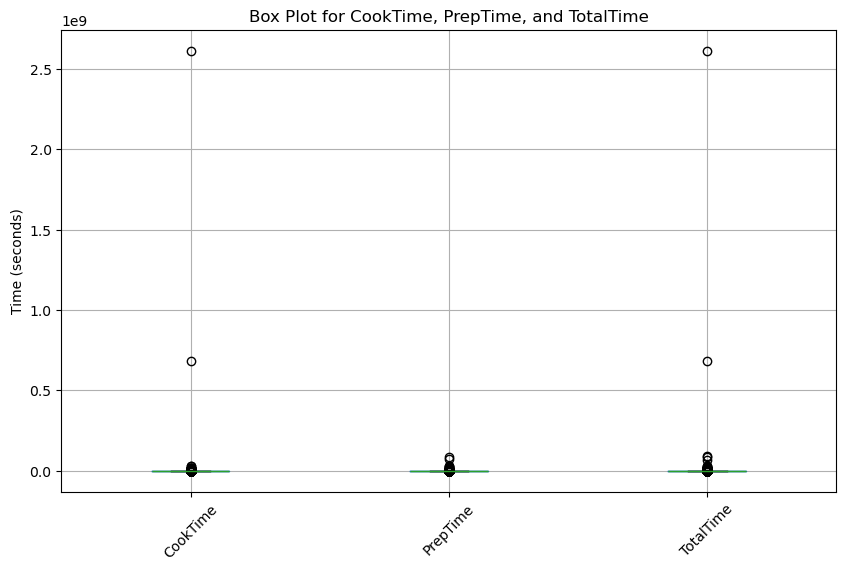

In [39]:
# Create a box plot for the specified columns 
plt.figure(figsize=(10, 6)) 
df[['CookTime', 'PrepTime', 'TotalTime']].boxplot() 
plt.title('Box Plot for CookTime, PrepTime, and TotalTime') 
plt.ylabel('Time (seconds)') 
plt.xticks(rotation=45) 
plt.show()


In [40]:
# Function to identify outliers using IQR
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Identify outliers in CookTime and TotalTime
cooktime_outliers = find_outliers(df['CookTime'])
totaltime_outliers = find_outliers(df['TotalTime'])

print("CookTime Outliers:")
print(cooktime_outliers)
print("\nTotalTime Outliers:")
print(totaltime_outliers)


CookTime Outliers:
0         86400.0
5          7200.0
17         7200.0
20         8040.0
29         9480.0
           ...   
522486    14400.0
522492     7200.0
522510    10800.0
522513    10800.0
522514    10800.0
Name: CookTime, Length: 46111, dtype: float64

TotalTime Outliers:
0         89100
1         15900
3         87600
20         9840
29        11580
          ...  
522486    17100
522492    14400
522510    12000
522513    12600
522514    14400
Name: TotalTime, Length: 48119, dtype: int64


In [41]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers in CookTime and TotalTime
df_cleaned = remove_outliers(df, 'CookTime')
df_cleaned = remove_outliers(df_cleaned, 'PrepTime')
df_cleaned = remove_outliers(df_cleaned, 'TotalTime')

print("DataFrame after removing outliers:")
print(df_cleaned)


DataFrame after removing outliers:
        RecipeId                                        Name    AuthorId  \
2             40                               Best Lemonade        1566   
4             42                                Cabbage Soup        1538   
6             44                      Warm Chicken A La King        1596   
7             45  Buttermilk Pie With Gingersnap Crumb Crust        1580   
8             46                     A Jad - Cucumber Pickle        1533   
...          ...                                         ...         ...   
522508    541375              Amazing Ground Beef Stroganoff  2002090414   
522509    541376               Spanish Coffee with Tia Maria  2001004241   
522511    541378                   Meg's Pumpkin Spice Bread  2001302649   
522515    541382    Quick & Easy Asian Cucumber Salmon Rolls  2001004241   
522516    541383                     Spicy Baked Scotch Eggs      188099   

        CookTime  PrepTime  TotalTime  \
2          

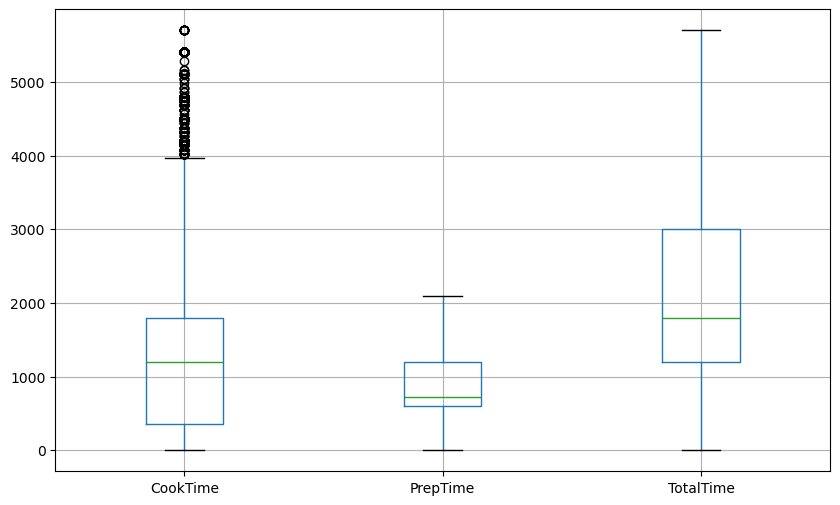

In [42]:
plt.figure(figsize=(10, 6)) 
df_cleaned[['CookTime', 'PrepTime', 'TotalTime']].boxplot() 
plt.show()

In [43]:
df_cleaned = df_cleaned[df_cleaned['CookTime'] <= 4000]

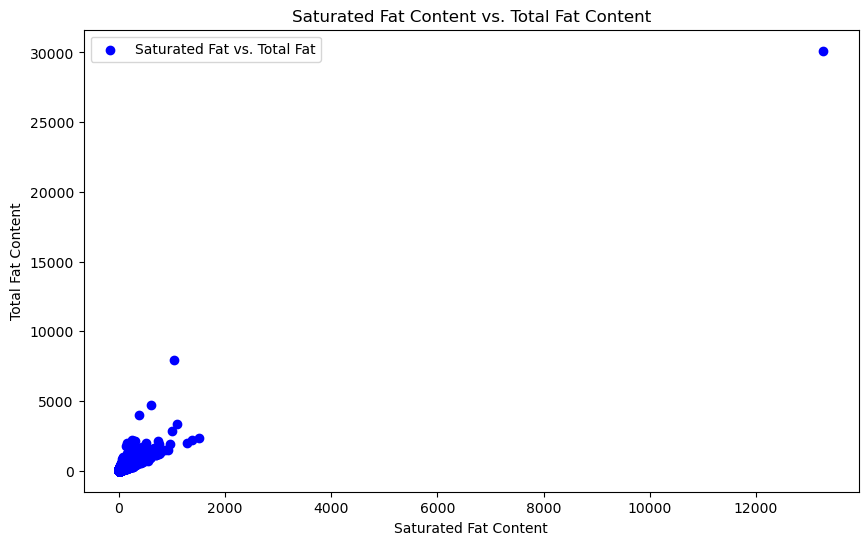

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['SaturatedFatContent'], df_cleaned['FatContent'], color='blue', label='Saturated Fat vs. Total Fat')
plt.title('Saturated Fat Content vs. Total Fat Content')
plt.xlabel('Saturated Fat Content')
plt.ylabel('Total Fat Content')
plt.legend()
plt.show()


In [45]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers in SaturatedFatContent and FatContent
df_cleaned = remove_outliers(df, 'SaturatedFatContent')
df_cleaned = remove_outliers(df_cleaned, 'FatContent')

# Display the cleaned DataFrame
print(df_cleaned.head())

   RecipeId                               Name  AuthorId  CookTime  PrepTime  \
0        38  Low-Fat Berry Blue Frozen Dessert      1533   86400.0      2700   
2        40                      Best Lemonade      1566     300.0      1800   
3        41     Carina's Tofu-Vegetable Kebabs      1586    1200.0     86400   
4        42                       Cabbage Soup      1538    1800.0      1200   
5        43               Best Blackbottom Pie     34879    7200.0      1200   

   TotalTime                                        Description  \
0      89100  Make and share this Low-Fat Berry Blue Frozen ...   
2       2100  This is from one of my  first Good House Keepi...   
3      87600  This dish is best prepared a day in advance to...   
4       3000  Make and share this Cabbage Soup recipe from F...   
5       8400  Make and share this Best Blackbottom Pie recip...   

                                              Images   RecipeCategory  \
0  c("https://img.sndimg.com/food/image/upl

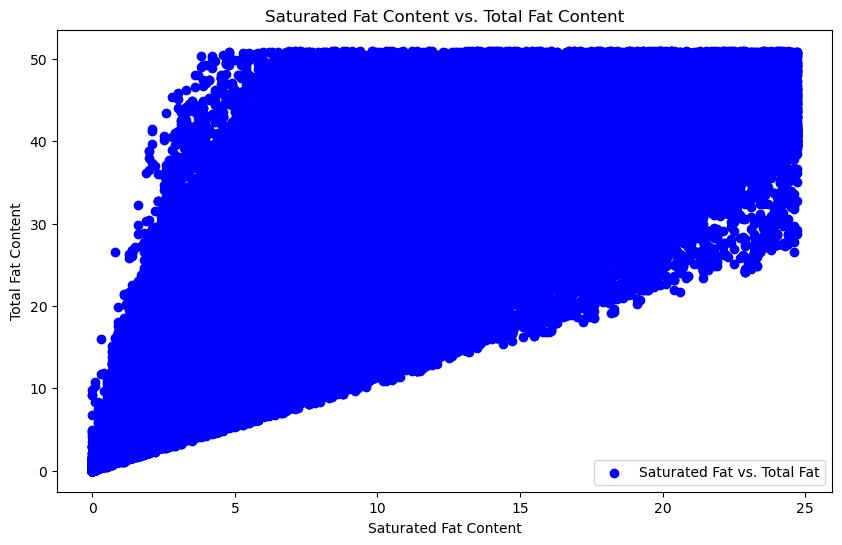

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['SaturatedFatContent'], df_cleaned['FatContent'], color='blue', label='Saturated Fat vs. Total Fat')
plt.title('Saturated Fat Content vs. Total Fat Content')
plt.xlabel('Saturated Fat Content')
plt.ylabel('Total Fat Content')
plt.legend()
plt.show()

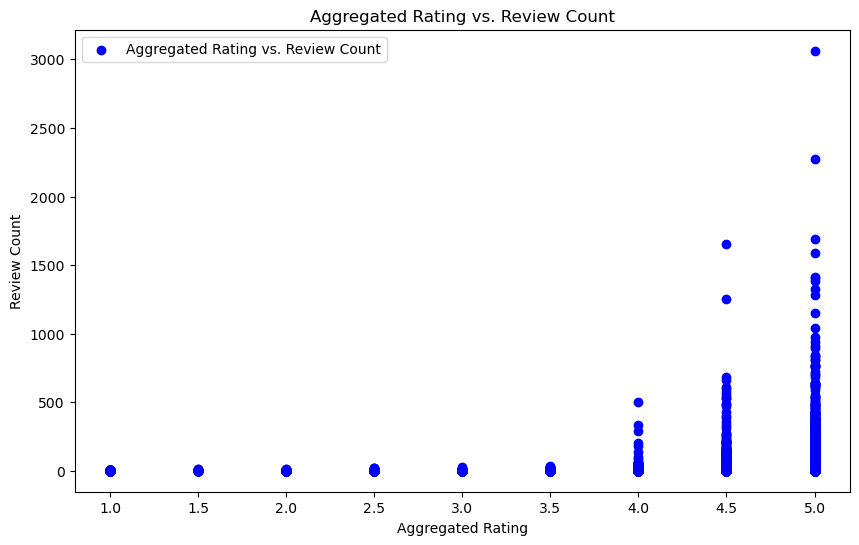

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['AggregatedRating'], df_cleaned['ReviewCount'], color='blue', label='Aggregated Rating vs. Review Count')
plt.title('Aggregated Rating vs. Review Count')
plt.xlabel('Aggregated Rating')
plt.ylabel('Review Count')
plt.legend()
plt.show()

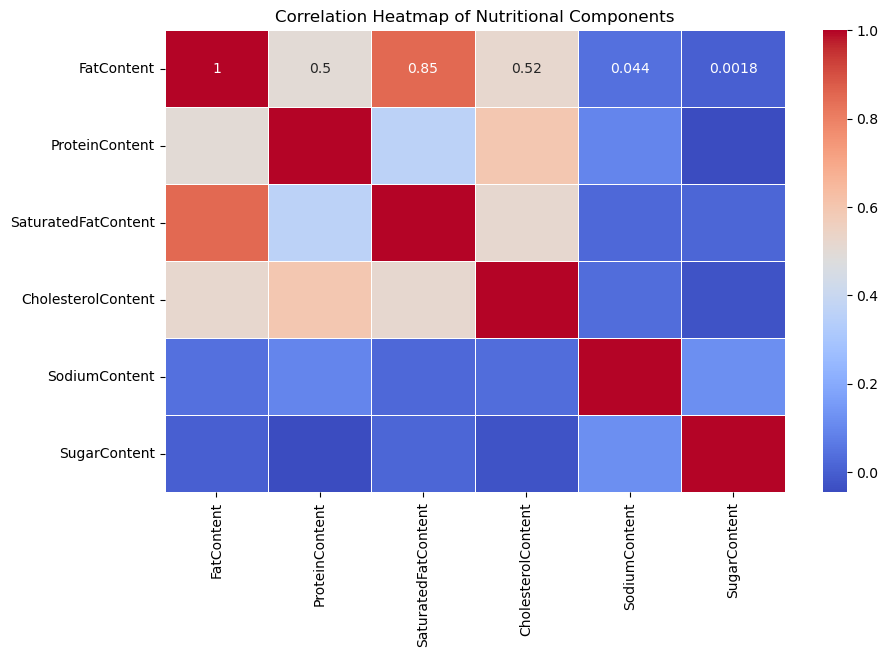

In [48]:
columns_of_interest = ['FatContent', 'ProteinContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'SugarContent']
df_selected = df_cleaned[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Nutritional Components')
plt.show()


In [49]:
df.to_csv('cleaned_recipes.csv', index=False)